Import Pandas Library

In [7]:
import pandas as pd

Import Dataset

In [8]:
std = pd.read_csv('StudentsPerformance.csv')
std.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Rename Columns

In [9]:
std = std.rename(columns={"race/ethnicity":"group","parental level of education":"education","test preparation course":"course_completation","math score":"math_score","reading score":"reading_score","writing score":"writing_score"})
std.head()

,gender,group,education,lunch,course_completation,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dropping Columns Not Used

In [10]:
std.drop(['lunch', 'education', 'course_completation', 'group'], axis=1, inplace=True)

In [11]:
std.head()

,gender,math_score,reading_score,writing_score
0,female,72,72,74
1,female,69,90,88
2,female,90,95,93
3,male,47,57,44
4,male,76,78,75


Import Matplotlib Library

In [28]:
import matplotlib.pyplot as plt

Data Visualization

Text(0, 0.5, 'Frequency')

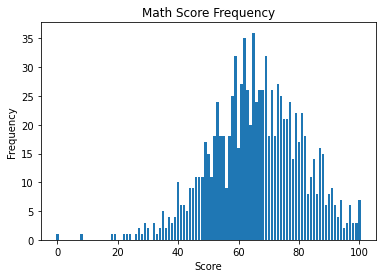

In [37]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = std['math_score'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Math Score Frequency') 
ax.set_xlabel('Score') 
ax.set_ylabel('Frequency')


In [34]:
std['math_score'].value_counts() 

65    36
62    35
59    32
69    32
73    27
      ..
22     1
19     1
18     1
8      1
0      1
Name: math_score, Length: 81, dtype: int64

Text(0, 0.5, 'Frequency')

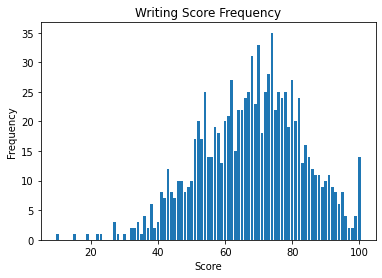

In [38]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = std['writing_score'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Writing Score Frequency') 
ax.set_xlabel('Score') 
ax.set_ylabel('Frequency')


In [35]:
std['writing_score'].value_counts() 

74    35
70    33
68    31
73    28
62    27
      ..
23     1
22     1
19     1
15     1
10     1
Name: writing_score, Length: 77, dtype: int64

Text(0, 0.5, 'Frequency')

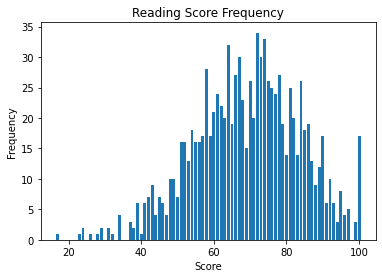

In [39]:
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = std['reading_score'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Reading Score Frequency') 
ax.set_xlabel('Score') 
ax.set_ylabel('Frequency')


In [36]:
|std['reading_score'].value_counts() 

72    34
74    33
64    32
73    30
67    30
      ..
32     1
28     1
26     1
23     1
17     1
Name: reading_score, Length: 72, dtype: int64

Change Gender Label to Binary Class Using Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
lb = LabelEncoder()
std['gender']=lb.fit_transform(std['gender'])

In [14]:
std.head()

,gender,math_score,reading_score,writing_score
0,0,72,72,74
1,0,69,90,88
2,0,90,95,93
3,1,47,57,44
4,1,76,78,75


In [15]:
std.gender.value_counts()

0    518
1    482
Name: gender, dtype: int64

Split Data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = std[['math_score', 'reading_score', 'writing_score']]
y = std['gender']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Training Data

In [18]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
decision_tree = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
predict = decision_tree.predict(X_test)

Making Confusion Matrix, Accuracy Score, and Classification Report

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [21]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        99
           1       0.87      0.81      0.84       101

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.84       200



In [22]:
cm = confusion_matrix(y_test, predict)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]
print(cm)

[[87 12]
 [19 82]]


In [23]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
spesifisitas = tn / (tn+fp)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
all_hasil = [recall,precision,spesifisitas,akurasi,f1]

print ("presisi : ",precision*100)
print ("spesifisitas : ",spesifisitas*100)
print("recall : ",recall*100)
print ("F1 : ",f1*100)
print("akurasi : ",akurasi*100)

presisi :  87.87878787878788
spesifisitas :  87.2340425531915
recall :  82.0754716981132
F1 :  84.87804878048782
akurasi :  84.5


In [24]:
print(accuracy_score(y_test, predict))

0.845
